# Hierarchical Clustering | Intro

### Importing libraries

In [73]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline

- The make_blobs() function can be used to generate blobs of points with a Gaussian distribution
- [4,4], [-2, -1], [1, 1], [10,4] shows we have 4 center points
- centers: center point

In [79]:
X1, y1 = make_blobs(n_samples=120, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

In [92]:
print(X1[:5],'\n') #n_samples
print(y1)

[[0.83997812 0.54510808]
 [0.23497147 0.3913772 ]
 [0.39702623 0.29386398]
 [0.53572536 0.62367042]
 [0.12384773 0.18645006]] 

[3 2 2 0 1 2 1 2 2 2 3 2 3 3 1 2 2 3 2 0 3 3 3 1 1 1 0 1 2 1 0 0 3 2 0 2 2
 1 3 1 0 1 1 2 1 3 0 0 2 3 1 1 1 2 2 0 3 1 3 0 1 0 0 3 1 1 1 1 0 1 0 0 3 2
 3 3 0 0 0 2 3 0 3 3 2 0 3 2 3 0 2 1 0 1 0 0 3 3 2 0 3 2 2 3 0 1 3 1 1 2 2
 2 3 0 0 1 1 3 0 2]


In [123]:
X1[2,1] # the second row & column 1

0.2938639824056402

### Displaying the scatter plot of the randomly generated data.

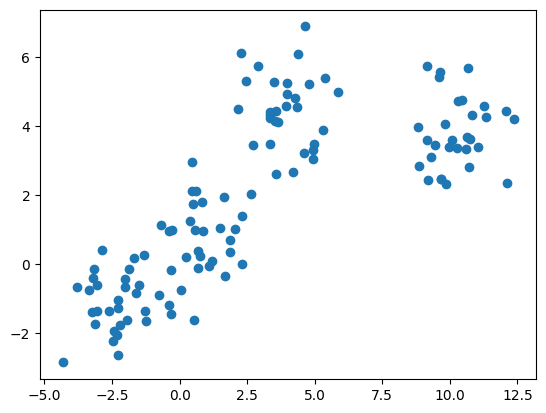

In [81]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') # marker is sign

- linkage criterion determines which distance to use between sets of observation


In [124]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [125]:
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

### plotting-clustering

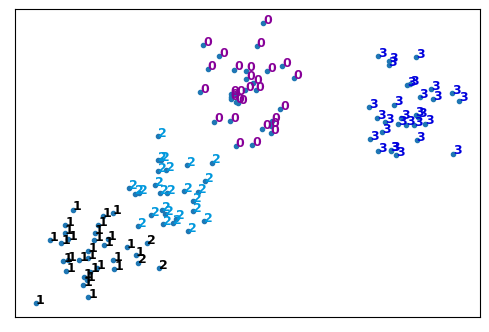

In [126]:
# Create a figure of size 6 inches by 4 inches
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Getting the average distance-values will be between 0-1 
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

## dendrogram

#### distance matrix contains the distance from each point to every other point of a dataset(1st.2nd,..points)

In [127]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.62423251 0.50924451 ... 0.1059348  0.40658533 0.61620642]
 [0.62423251 0.         0.1891311  ... 0.70271498 0.4035143  0.00809677]
 [0.50924451 0.1891311  0.         ... 0.60326885 0.43066802 0.184351  ]
 ...
 [0.1059348  0.70271498 0.60326885 ... 0.         0.4293809  0.69462055]
 [0.40658533 0.4035143  0.43066802 ... 0.4293809  0.         0.39669007]
 [0.61620642 0.00809677 0.184351   ... 0.69462055 0.39669007 0.        ]]


In [130]:
#linkage: performs hierarchical/agglomerative clustering
Z = hierarchy.linkage(dist_matrix, method = 'complete')

/tmp/ipykernel_3865/4127986387.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, method = 'complete')


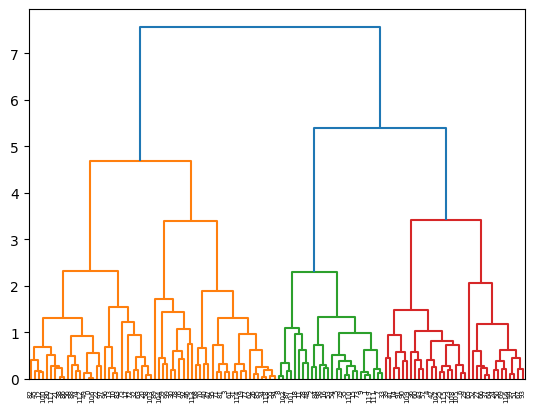

In [131]:
dendro = hierarchy.dendrogram(Z)